# Nettoyage des données

**Sommaire**

1. Chargement des données brut
2. Comptage du nombre de données manquantes
3. Nettoyage et remplissage des jeux de données

In [41]:
%load_ext autoreload
%autoreload
%env ROOT_PATH=../

import logging
import sys

sys.path.insert(0, '../')
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import matplotlib.pyplot as plt

from lib.data.accidents import loaders
from lib import utils
from lib.constant import Datasets, to_csv_kwargs

get_path_raw = '../data/raw/accidents/{}.csv'.format
get_path_interim = '../data/interim/accidents/{}.csv'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: ROOT_PATH=../


## Chargement des données brut

Les données proviennent du site [data.gouv.fr](https://www.data.gouv.fr/fr/datasets), la platforme opendata du gouvernement français. Les jeux de données que j'utilise ici ce trouvent [à cette adresse](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/).

Il s'agit d'un ensemble de fichier au format csv rassemblant les informations collectées par les force de l'ordre de 2006 à 2019. Pour chaque année, les données sont séparées en 4 fichiers :

- **caractériqtiques** : informations générales sur l'accident (date, conditions météo, localisation...)
- **lieux** : informations sur la route (type de route, aménagement, nombre de vois...)
- **véhicules** : informations sur les véhicules impliqués (catégorie, obstacle percuté, manoeuvre avant accident...)
- **usagers** : informations sur les personnes impliquées (sexe, date de naissance, place dans le véhicule...)

In [30]:
for data_name in Datasets.list_all():
    out_path = get_path_raw(data_name)
    if not utils.is_file_exists_locally(out_path):
        data = loaders.get_raw_dataset(data_name)
        data.to_csv(out_path, **to_csv_kwargs)

INFO:root:file ../data/raw/accidents/caracs.csv already exists
INFO:root:file ../data/raw/accidents/users.csv already exists
INFO:root:file ../data/raw/accidents/locations.csv already exists
INFO:root:file ../data/raw/accidents/vehicles.csv already exists


## Comptage du nombre de données manquantes

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (4,6,7,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/raw/accidents/caracs.csv: 236756 lines loaded (16.72)Mb


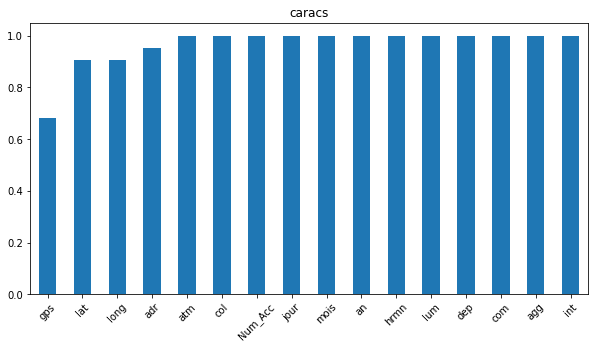

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (1,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/raw/accidents/users.csv: 532589 lines loaded (20.83)Mb


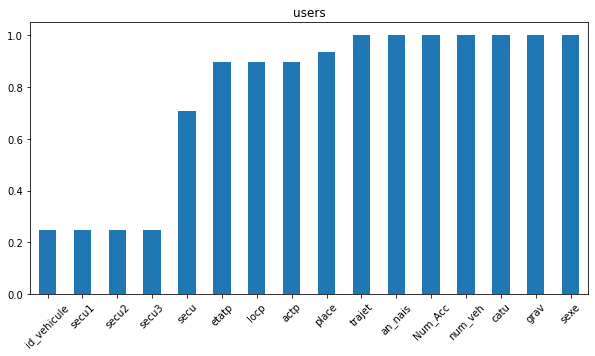

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/raw/accidents/locations.csv: 236756 lines loaded (20.32)Mb


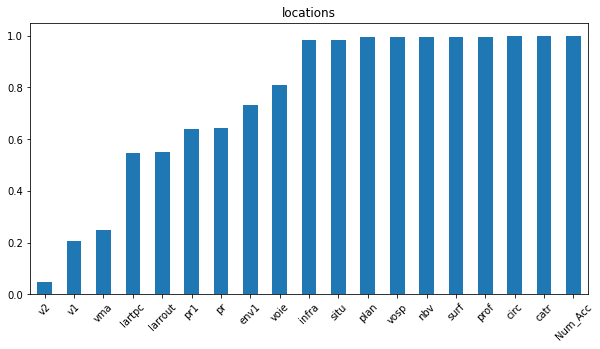

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/raw/accidents/vehicles.csv: 405056 lines loaded (13.91)Mb


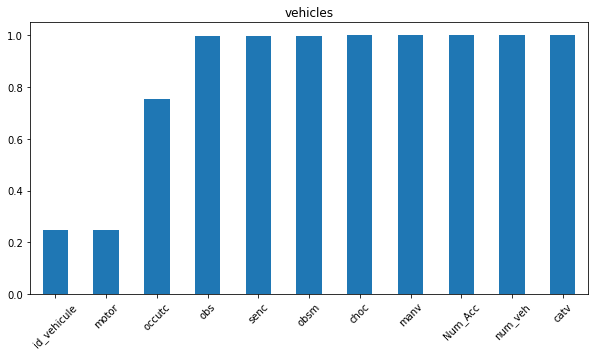

In [45]:
for data_name in Datasets.list_all():
    path = get_path_raw(data_name)
    dtypes = loaders.dtypes(data_name)
    data = utils.get_dataset(path, dtypes=dtypes)
    nas_count = utils.count_na(data)
    nas_count['filled_rate'].plot.bar(figsize=(10, 5), rot=45, title=data_name)
    plt.show()